# Youtube数据挖掘

## 1.引包

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

## 2. 数据引入

In [3]:
df_youtube_us = pd.read_csv("archive/USvideos.csv")

## 3.数据摘要

### 3.1数据示例

In [12]:
df_youtube_us.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


### 3.2 数据总个数

In [7]:
df_youtube_us.shape

(40949, 16)

## 3.3 数据频数

### 3.3.1 各属性的独立数据个数

In [113]:
for column_name in df_youtube_us:
    print("-------------分割线-------------")
    print("%s的总描述:\n"%(column_name),df_youtube_us[column_name].describe())
    print("%s的每个值的频次:\n"%(column_name),df_youtube_us[column_name].value_counts())
    

-------------分割线-------------
video_id的总描述:
 count           40949
unique           6351
top       j4KvrAUjn6c
freq               30
Name: video_id, dtype: object
video_id的每个值的频次:
 j4KvrAUjn6c    30
MAjY8mCTXWk    29
r-3iathMo7o    29
NBSAQenU2Bk    29
QBL8IRJ5yHU    29
               ..
2X5fG1A4kuc     1
A8QY1IRPGTY     1
zYWt2mnalP8     1
yW6ORWYn3g0     1
ufOnBRXy3Pc     1
Name: video_id, Length: 6351, dtype: int64
-------------分割线-------------
trending_date的总描述:
 count        40949
unique         205
top       18.05.06
freq           200
Name: trending_date, dtype: object
trending_date的每个值的频次:
 18.05.06    200
18.03.06    200
18.11.06    200
17.13.12    200
18.07.05    200
           ... 
18.01.02    197
18.31.01    197
18.02.02    196
18.03.02    196
18.04.02    196
Name: trending_date, Length: 205, dtype: int64
-------------分割线-------------
title的总描述:
 count                                          40949
unique                                          6455
top       WE MADE OUR M

likes_log的每个值的频次:
 0.000000     172
1.098612      34
3.688879      22
1.945910      21
2.197225      20
            ... 
11.157621      1
10.869159      1
9.624699       1
12.643895      1
11.721410      1
Name: likes_log, Length: 29850, dtype: int64
-------------分割线-------------
views_log的总描述:
 count    40949.000000
mean        13.337995
std          1.709989
min          6.309918
25%         12.398056
50%         13.432583
75%         14.416081
max         19.232552
Name: views_log, dtype: float64
views_log的每个值的频次:
 12.394161    3
10.909034    3
12.367673    3
10.121056    3
9.047115     3
            ..
13.694479    1
10.859749    1
15.130452    1
16.684928    1
13.421313    1
Name: views_log, Length: 40478, dtype: int64
-------------分割线-------------
dislikes_log的总描述:
 count    40949.000000
mean         6.387610
std          1.915583
min          0.000000
25%          5.313206
50%          6.448889
75%          7.569928
max         14.330978
Name: dislikes_log, dtype: float64
dislik

## 3.4 五数概括和缺失值个数

In [68]:
# 纯数值的属性
number_list = ["category_id","views","likes","dislikes","comment_count"]

In [76]:
# 输出指定数据、指定属性的5数概括及缺失值的个数
# column_name: 属性名
# data: 数据来源
def FiveNumberandNull(data,column_name): 
    print("%s的情况如下："%(column_name))
    # 缺失值的情况
    data_column = data[column_name]
    null_number = data_column.isnull().sum()
    print("null的个数:%d"%(null_number))
    # 五数概括 Minimum（最小值）、Q1（25%）、Median（中位数、）、Q3（75%）、Maximum（最大值）
    data_column = data_column.dropna(axis = 0) #删除NaN值
    Minimum = min(data_column)
    Maximum = max(data_column)
    Q1 = np.percentile(data_column, 25)
    Median = np.median(data_column)
    Q3 = np.percentile(data_column, 75)
    print("五数概括：Minimum:%d; Q1:%d; Median:%d; Q3:%d; Maximum:%d;\n"%(Minimum , Q1 , Median , Q3 , Maximum))

**由数据分析可以发现，数据集中这些主要的数字数据不包含NULL**

In [77]:
for column_name in number_list:
    FiveNumberandNull(df_youtube_us,column_name)

category_id的情况如下：
null的个数:0
五数概括：Minimum:1; Q1:17; Median:24; Q3:25; Maximum:43;

views的情况如下：
null的个数:0
五数概括：Minimum:549; Q1:242329; Median:681861; Q3:1823157; Maximum:225211923;

likes的情况如下：
null的个数:0
五数概括：Minimum:0; Q1:5424; Median:18091; Q3:55417; Maximum:5613827;

dislikes的情况如下：
null的个数:0
五数概括：Minimum:0; Q1:202; Median:631; Q3:1938; Maximum:1674420;

comment_count的情况如下：
null的个数:0
五数概括：Minimum:0; Q1:614; Median:1856; Q3:5755; Maximum:1361580;



## 3.5 绘图

以直方图、盒图、分布图为例

In [110]:
#绘制直方图:100bins
def histogram(column_name,data): 
    histogram = data[column_name].hist(bins= 100) 
    plt.title(column_name)
    plt.show()
    
#绘制盒图
def box(column_name,data):    
    data[column_name].plot.box()
    plt.title(column_name)
    plt.show()
    df_yout['likes_log'] = np.log(df_yout['likes'] + 1)
# 绘制正态分布图
def logDistribution(data):
    data['likes_log'] = np.log(data['likes'] + 1)
    data['views_log'] = np.log(data['views'] + 1)
    data['dislikes_log'] = np.log(data['dislikes'] + 1)
    data['comment_log'] = np.log(data['comment_count'] + 1)

    plt.figure(figsize = (12,6))

    plt.subplot(221)
    g1 = sns.distplot(data['views_log'])
    g1.set_title("VIEWS LOG DISTRIBUITION", fontsize=16)

    plt.subplot(224)
    g2 = sns.distplot(data['likes_log'],color='green')
    g2.set_title('LIKES LOG DISTRIBUITION', fontsize=16)

    plt.subplot(223)
    g3 = sns.distplot(data['dislikes_log'], color='r')
    g3.set_title("DISLIKES LOG DISTRIBUITION", fontsize=16)

    plt.subplot(222)
    g4 = sns.distplot(data['comment_log'])
    g4.set_title("COMMENTS LOG DISTRIBUITION", fontsize=16)

    plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)
    
    plt.show()

### 3.5.1 直方图

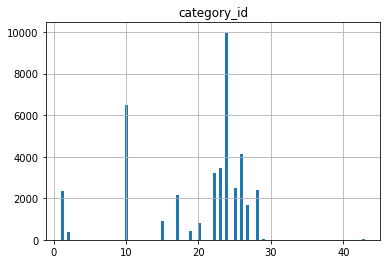

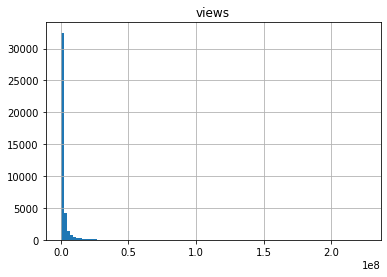

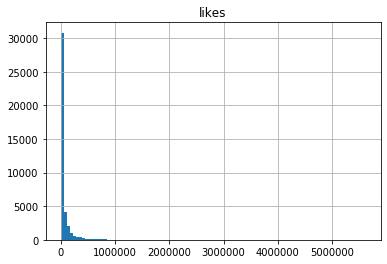

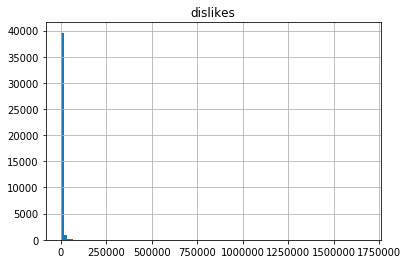

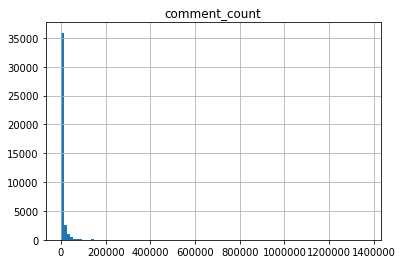

In [99]:
for column_name in number_list:
    histogram(column_name,df_youtube_us)

### 3.5.2 盒图

绝大多数的类别id处在10到30之间   
观看次数的数量随着数值增大而减小，绝大多数位于1.5le8以下


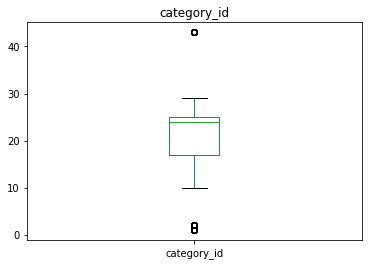

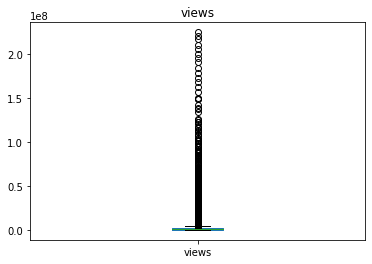

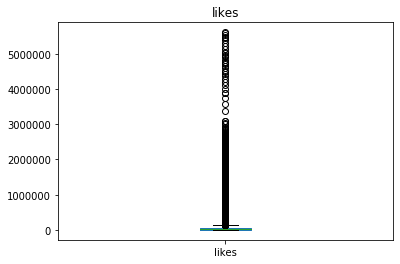

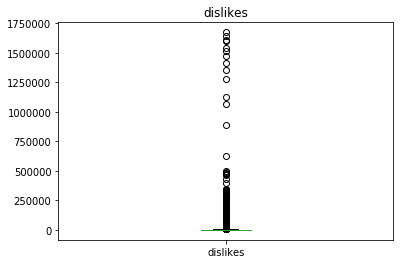

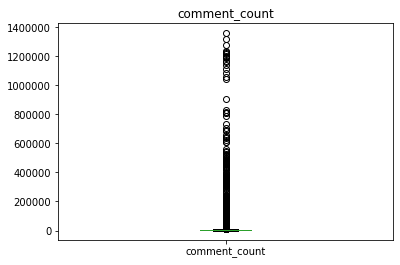

In [100]:
for column_name in number_list:
    box(column_name,df_youtube_us)

In [65]:
df_youtube_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 17 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
likes_log                 40949 non-null float64
dtypes: bool(3), float64(1), int64(5), object(8)
memory usage: 4.5+ MB


### 3.5.3 分布图

/Users/guopeiqi/opt/anaconda3/envs/deeplearning/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/guopeiqi/opt/anaconda3/envs/deeplearning/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/guopeiqi/opt/anaconda3/envs/deeplearning/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to

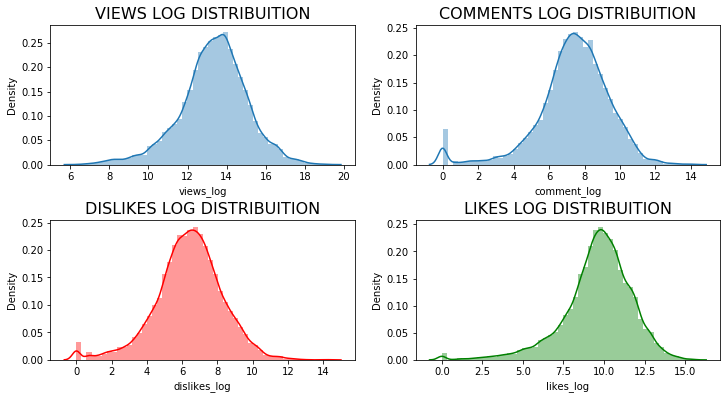

In [111]:
logDistribution(df_youtube_us)

## 3.6 缺失值处理

**由于数据中的主要数值型数据不包含null值，所以不需要进行缺失值处理，若存在，可以使用以下方法进行处理，并进行可视化对比**

In [112]:
# 剔除null，并可视化对比
def null_drop(data):    
    data_nonull = data.dropna(axis = 0)
    # 绘制直方图
    hist = Data1.hist(bins=100)  
    # 绘制盒图
    data_nonull.plot.box()
    plt.show()
    
# 用最高频率值来填补缺失值
def null_mode(data):    
    data_nonull = data.fillna(data.mode()) #使用众数
    # 绘制直方图
    hist = data_nonull.hist(bins=100)  
    # 绘制盒图
    data_nonull.plot.box()
    plt.show()